<a href="https://colab.research.google.com/github/anuraagbarde/MachineLearning/blob/main/2018BCS010_ML_LAB_asg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Global Init

In [109]:
import numpy as np;
import matplotlib.pyplot as plt;
import math;
from random import randrange

# Global variables
n=20;                 # No. of points for the Dataset
xTrainData=np.zeros(n);       # Independent points 
yTrainData=np.zeros(n);       # Dependent points

# Create Training Dataset

In [110]:
# Normal distribution Noise Generation
noise=np.random.normal(0,0.15,n); #(mean, variance, no. of points)
print(noise)

[ 0.26073931 -0.0622438   0.10691187  0.13128226  0.2091561   0.21636646
  0.3211207  -0.15008236  0.11520181  0.06725873 -0.25205954  0.20727581
 -0.01405055 -0.11195349  0.03478477 -0.09343585  0.0244702  -0.07337399
  0.04523948  0.01833597]


In [111]:
# Generation of Random Dataset as training => y = sin(x) + noise
for i in range(0,n):
    temp=randrange(0,n+1,1)*2*math.pi/n
    xTrainData[i] = temp
    yTrainData[i] = math.sin(temp)+noise[i]

xTrainData = xTrainData.reshape(n,1)
yTrainData = yTrainData.reshape(n,1)

print('Randomly Generated Train Dataset with 20 points')
print('X | Y');
for i in range(0,n):
  print(xTrainData[i] , ' | ' , yTrainData[i]);


Randomly Generated Train Dataset with 20 points
X | Y
[5.96902604]  |  [-0.04827768]
[4.71238898]  |  [-1.0622438]
[0.9424778]  |  [0.91592887]
[1.25663706]  |  [1.08233878]
[0.62831853]  |  [0.79694135]
[4.39822972]  |  [-0.73469006]
[0.]  |  [0.3211207]
[4.71238898]  |  [-1.15008236]
[5.96902604]  |  [-0.19381518]
[3.14159265]  |  [0.06725873]
[2.19911486]  |  [0.55695746]
[4.39822972]  |  [-0.7437807]
[4.39822972]  |  [-0.96510706]
[0.9424778]  |  [0.69706351]
[1.57079633]  |  [1.03478477]
[1.57079633]  |  [0.90656415]
[5.34070751]  |  [-0.78454679]
[2.82743339]  |  [0.23564301]
[1.57079633]  |  [1.04523948]
[1.57079633]  |  [1.01833597]


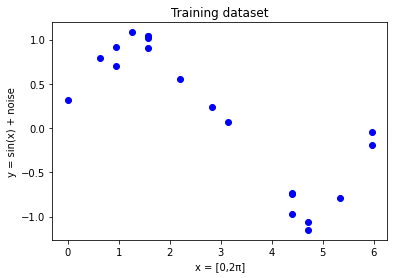

In [112]:
# Plot of Training Dataset
plt.plot(xTrainData,yTrainData,'bo');
plt.xlabel('x = [0,2π]');
plt.ylabel('y = sin(x) + noise');
plt.title('Training dataset');
plt.show()

# Create Testing Dataset

In [113]:
# Generation of Random Dataset as training => y = sin(x)

xTestData=np.zeros(n);       # Independent points 
yTestData=np.zeros(n);       # Dependent points

for i in range(0,n):
    temp=randrange(0,n+1,1)*2*math.pi/n
    xTestData[i] = temp
    yTestData[i] = math.sin(temp)

xTestData = xTestData.reshape(n,1)
yTestData = yTestData.reshape(n,1)

print('Randomly Generated Test Dataset with 20 points')
print('X | Y');
for i in range(0,n):
  print(xTestData[i] , ' | ' , yTestData[i]);


Randomly Generated Test Dataset with 20 points
X | Y
[4.71238898]  |  [-1.]
[0.31415927]  |  [0.30901699]
[4.39822972]  |  [-0.95105652]
[0.31415927]  |  [0.30901699]
[2.19911486]  |  [0.80901699]
[5.02654825]  |  [-0.95105652]
[0.31415927]  |  [0.30901699]
[3.14159265]  |  [1.2246468e-16]
[3.45575192]  |  [-0.30901699]
[1.88495559]  |  [0.95105652]
[0.9424778]  |  [0.80901699]
[4.08407045]  |  [-0.80901699]
[2.51327412]  |  [0.58778525]
[4.39822972]  |  [-0.95105652]
[1.25663706]  |  [0.95105652]
[0.31415927]  |  [0.30901699]
[3.76991118]  |  [-0.58778525]
[5.34070751]  |  [-0.80901699]
[4.08407045]  |  [-0.80901699]
[0.]  |  [0.]


# Prediction

## Direct linear regression

In [114]:
# Fitting Direct Simple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xTrainData, yTrainData)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
yPredictData = regressor.predict(xTestData)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(yTestData, yPredictData, squared=True)
print('mse =',mse)

mse = 0.2984952307352399


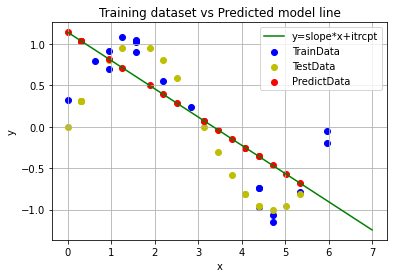

mse = 0.2984952307352399


In [116]:
slope = regressor.coef_[0][0]
intercept = regressor.intercept_[0]
# print(slope)
# print(intercept)


plt.scatter(xTrainData,yTrainData,color = 'b' , label='TrainData');
plt.scatter(xTestData,yTestData,color = 'y', label='TestData');
plt.scatter(xTestData,yPredictData,color = 'r', label='PredictData');

xPredictionLine = np.linspace(0,7,20)
yPredictionLine = slope*x+intercept

plt.plot(xPredictionLine, yPredictionLine, '-g', label='y=slope*x+itrcpt')


plt.title('Training dataset vs Predicted model line');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best')
plt.grid()
plt.show()

print('mse =',mse)